# Handwritten_Equation_Solver

Here is the code that load the dataset from <code>dataset</code> folder and design a fully-connected Neural Network to classify them in 13 classes (10 digits and three math signs: -, +, x). Then we use the trained model to read and predict the digits of the test set.

The dataset is downloaded from:
[dataset link](https://github.com/vipul79321/Handwritten-Equation-Solver)

(The following code is however mine)

### By: ZaraPhCode

Importing necessary modules:

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Load, visualize and preprocessing the dataset

The data are at folder <code>dataset</code>. Data associated with each class are in similar subfolders.

Lets see the number of pictures in folder <code>0</code>:

In [6]:
len(os.listdir('dataset/0'))

3834

Lets see one of the data in folder <code>0</code>:

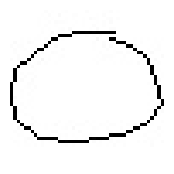

In [8]:
img = mpimg.imread('dataset/0/0_46621.jpg')
plt.figure(figsize=(2,2))
imgplot = plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

We are going to need the dimension of images for training:

In [4]:
img.shape

(45, 45)

Determining model parameters and building the train and validation datasets:

In [9]:
h = 45
w = 45
image_size = (h,w)
batch_size = 64
dataset_folder = 'dataset'

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_folder,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 47504 files belonging to 13 classes.
Using 38004 files for training.
Using 9500 files for validation.


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [10]:
class_names = train_ds.class_names
print(class_names)

['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'times']


Lets plot some instances from our dataset:

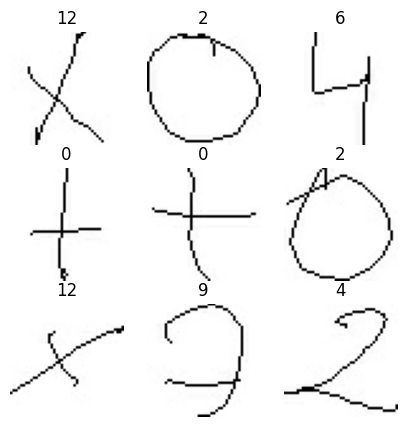

In [11]:
plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 45,45, 3)`. This is a batch of 32 images of shape `45x45x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

You can call `.numpy()` on the `image_batch` and `labels_batch` tensors to convert them to a `numpy.ndarray`.


In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 45, 45, 3)
(64,)


Here we use <code>prefetch</code> for caching and reducing RAM usage:

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Building the model

Determining model architecture

In [14]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(h,w, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, name="outputs")
])

Compiling the model:

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 45, 45, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        1

Fitting the model:

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


594/594 [==============================] - 41s 48ms/step - loss: 0.3072 - accuracy: 0.9070 - val_loss: 0.1026 - val_accuracy: 0.9699
Epoch 2/10
594/594 [==============================] - 25s 43ms/step - loss: 0.0514 - accuracy: 0.9861 - val_loss: 0.0427 - val_accuracy: 0.9892
Epoch 3/10
594/594 [==============================] - 26s 43ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0.0346 - val_accuracy: 0.9925
Epoch 4/10
594/594 [==============================] - 26s 43ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0383 - val_accuracy: 0.9923
Epoch 5/10
594/594 [==============================] - 26s 43ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0296 - val_accuracy: 0.9940
Epoch 6/10
594/594 [==============================] - 26s 44ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0331 - val_accuracy: 0.9935
Epoch 7/10
594/594 [==============================] - 26s 43ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0403 - val_accuracy: 0.9912
Epo

# Model Evaluation

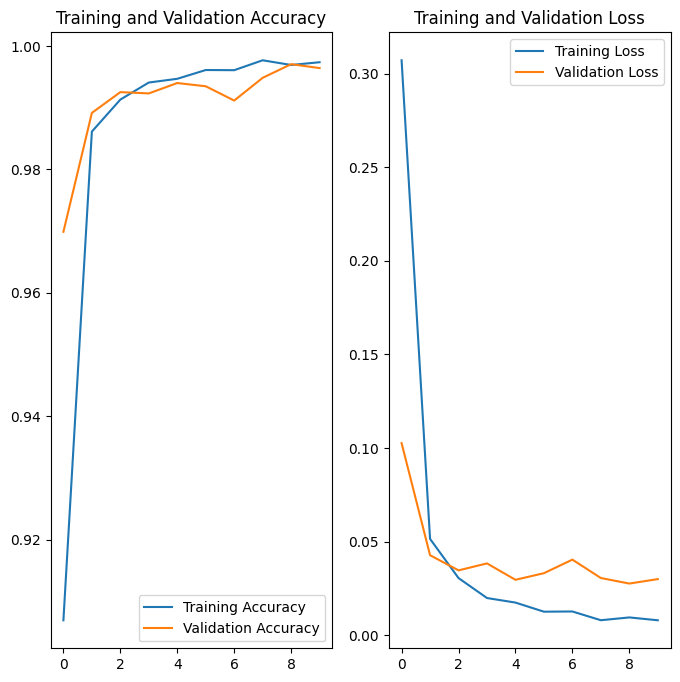

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Learning curves show excellent result for our learning model!

Now we load all the images in a variable 'X_train' and all the associated labels in variable 'y_train'.

Then we randomly choos a data, plot it and use the model to predict the label:

This image most likely belongs to 0 with a 100.00 percent confidence.


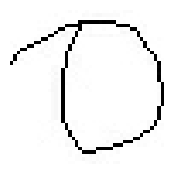

In [19]:
X_train = []
y_train = []

for images, labels in train_ds.map(lambda x, y: (x, y)):
    X_train.append(images)
    y_train.append(labels)

rand_batch_no = random.randint(0,batch_size)
X_rand = X_train[0][rand_batch_no].numpy()
ground_truth = y_train[0][rand_batch_no].numpy()
img_array = tf.expand_dims(X_rand, 0) # Create a batch

predictions = model(img_array).numpy()
y_pred = np.argmax(tf.nn.softmax(predictions).numpy())

score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

plt.figure(figsize=(2,2))
plt.imshow(X_rand.astype("uint8"))
plt.axis("off")
plt.show()

# Solving equations:

In order to solve handwritten simple equation, we define a function to pick 2 random numbers and a sign from the training set:

In [20]:
def pick_equation():
    flag = 1

    while flag == 1:
        rand_batch_no = random.randint(0,batch_size)
        X_rand = X_train[0][rand_batch_no].numpy()
        ground_truth = y_train[0][rand_batch_no].numpy()
        img_array = tf.expand_dims(X_rand, 0) # Create a batch

        predictions = model(img_array).numpy()
        y_pred = np.argmax(tf.nn.softmax(predictions).numpy())
        if y_pred == 0 or y_pred == 1 or y_pred == 12:
            sign = y_pred
            sign_img = X_train[0][rand_batch_no].numpy()
            flag = 0

    while flag == 0:
        rand_batch_no = random.randint(0,batch_size)
        X_rand = X_train[0][rand_batch_no].numpy()
        ground_truth = y_train[0][rand_batch_no].numpy()
        img_array = tf.expand_dims(X_rand, 0) # Create a batch

        predictions = model(img_array).numpy()
        y_pred = np.argmax(tf.nn.softmax(predictions).numpy())
        if y_pred != 0 and y_pred != 1 and y_pred != 12:
            a = y_pred - 2
            a_img = X_train[0][rand_batch_no].numpy()

        rand_batch_no = random.randint(0,batch_size)
        X_rand = X_train[0][rand_batch_no].numpy()
        ground_truth = y_train[0][rand_batch_no].numpy()
        img_array = tf.expand_dims(X_rand, 0) # Create a batch
    
        predictions = model(img_array).numpy()
        y_pred = np.argmax(tf.nn.softmax(predictions).numpy())
        if y_pred != 0 and y_pred != 1 and y_pred != 12:
            b = y_pred - 2
            b_img = X_train[0][rand_batch_no].numpy()
            flag = 1

    return a , b , sign , a_img , b_img , sign_img

plotting the resulting handwritten equation:

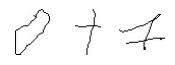

In [21]:
a,b,sign, a_img , b_img , sign_img = pick_equation()


plt.figure(figsize=(2,2))
ax = plt.subplot(1,3, 1)
plt.imshow(a_img.astype("uint8"))
plt.axis("off")

ax = plt.subplot(1,3, 2)
plt.imshow(sign_img.astype("uint8"))
plt.axis("off")

ax = plt.subplot(1,3, 3)
plt.imshow(b_img.astype("uint8"))
plt.axis("off")

plt.show()

Solving the equation using the predicted values from the model:

In [22]:
if sign == 0:
    print('{}+{}={}'.format(a,b,a+b))
elif sign == 1:
    print('{}-{}={}'.format(a,b,a-b))
elif sign == 12:
    print('{}x{}={}'.format(a,b,a*b))

0+7=7
